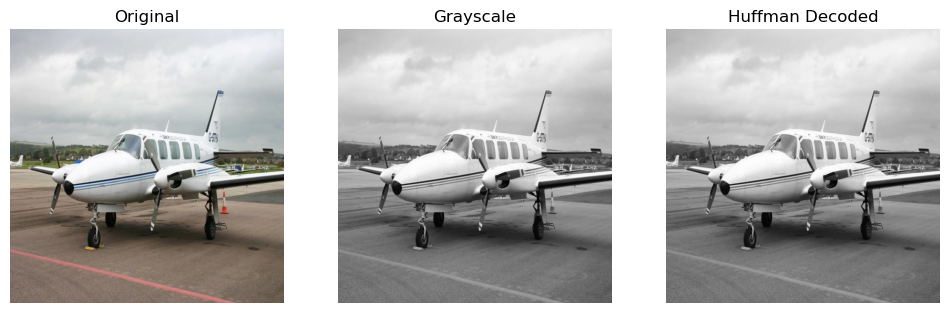

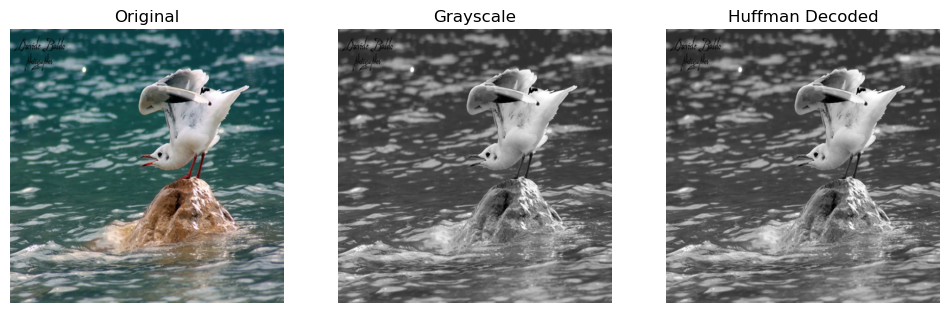

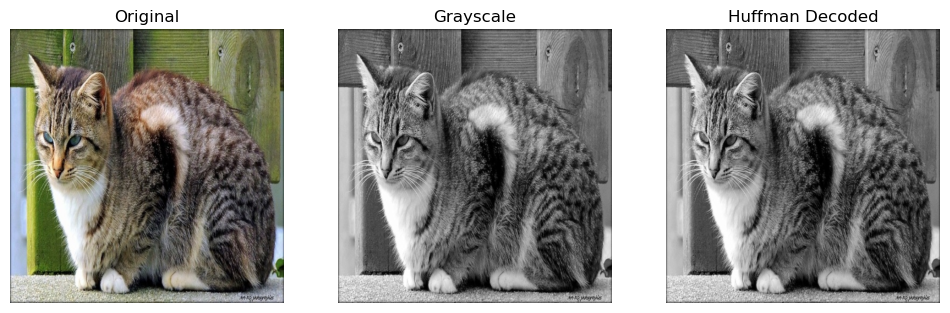

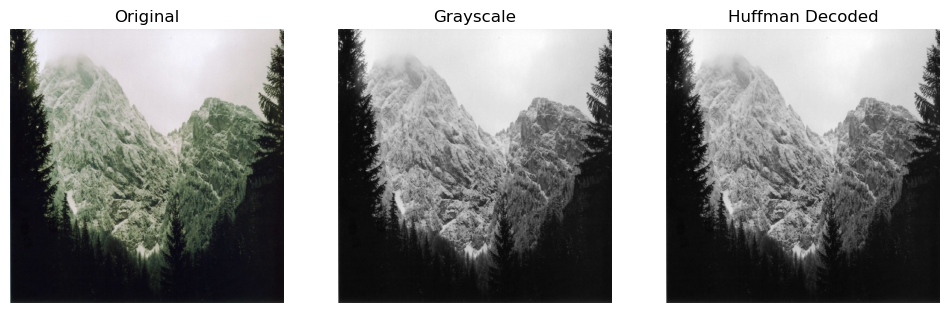

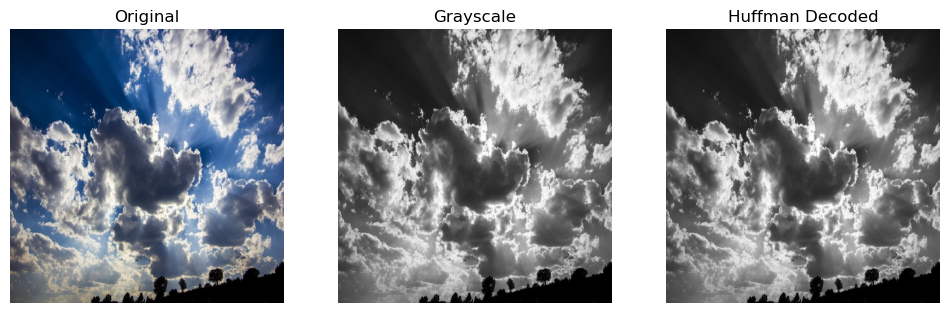

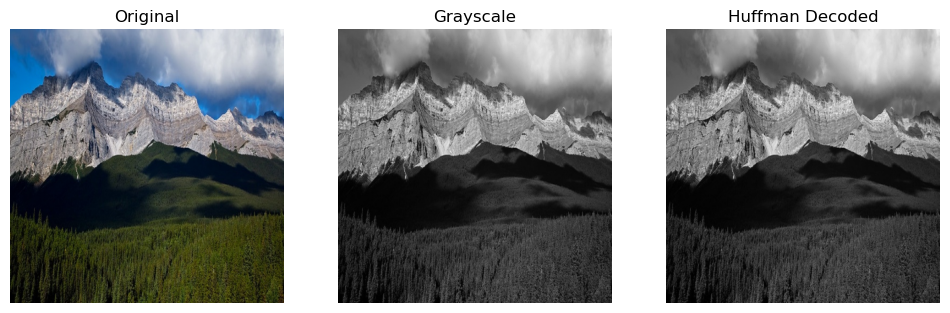

In [2]:
import cv2
import numpy as np
import os
import heapq
import matplotlib.pyplot as plt
from collections import Counter

INPUT_DIR = r"C:\Users\jayja\Desktop\Images 2"
OUTPUT_DIR = os.path.join(INPUT_DIR, "Huffman compressed images")
os.makedirs(OUTPUT_DIR, exist_ok=True)

class Node:
    def __init__(self, symbol, freq):
        self.symbol = symbol
        self.freq = freq
        self.left = None
        self.right = None
    def __lt__(self, other):
        return self.freq < other.freq

def build_huffman_tree(freq_dict):
    heap = [Node(sym, freq) for sym, freq in freq_dict.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        n1, n2 = heapq.heappop(heap), heapq.heappop(heap)
        merged = Node(None, n1.freq + n2.freq)
        merged.left, merged.right = n1, n2
        heapq.heappush(heap, merged)
    return heap[0]

def build_codes(node, prefix="", codebook=None):
    if codebook is None:
        codebook = {}
    if node is not None:
        if node.symbol is not None:
            codebook[node.symbol] = prefix
        build_codes(node.left, prefix+"0", codebook)
        build_codes(node.right, prefix+"1", codebook)
    return codebook

def huffman_encode(data):
    freq = Counter(data.flatten())
    tree = build_huffman_tree(freq)
    codebook = build_codes(tree)
    encoded = "".join(codebook[val] for val in data.flatten())
    return encoded, codebook, data.shape

def huffman_decode(encoded, codebook, shape):
    reverse_codebook = {v: k for k, v in codebook.items()}
    decoded = []
    code = ""
    for bit in encoded:
        code += bit
        if code in reverse_codebook:
            decoded.append(reverse_codebook[code])
            code = ""
    return np.array(decoded).reshape(shape).astype(np.uint8)

shown = 0
for file in os.listdir(INPUT_DIR):
    path = os.path.join(INPUT_DIR, file)
    img = cv2.imread(path)
    if img is None: 
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    encoded, codebook, shape = huffman_encode(gray)
    decoded_img = huffman_decode(encoded, codebook, shape)

    base, ext = os.path.splitext(file)
    cv2.imwrite(os.path.join(OUTPUT_DIR, base+"_huffman.png"), decoded_img)

    if shown < 6:
        plt.figure(figsize=(12,4))
        plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original"); plt.axis("off")
        plt.subplot(1,3,2); plt.imshow(gray, cmap="gray"); plt.title("Grayscale"); plt.axis("off")
        plt.subplot(1,3,3); plt.imshow(decoded_img, cmap="gray"); plt.title("Huffman Decoded"); plt.axis("off")
        plt.show()
        shown += 1